# CIFAR-10 Dataset
+ https://www.cs.toronto.edu/~kriz/cifar.html
+ The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, notebook

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

## 데이터 import & 전처리

In [3]:
from torchvision import transforms, datasets
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10("../data/CIFAR_10/",
                     train = True,
                     download = True,
                     transform = transforms.Compose([
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5),
                                              (0.5, 0.5, 0.5))])), batch_size = 64, shuffle = True)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10("../data/CIFAR_10",
                     train = False,
                     transform = transforms.Compose([
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5),
                                              (0.5, 0.5, 0.5))])), batch_size = 64 )


label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/CIFAR_10/cifar-10-python.tar.gz to ../data/CIFAR_10/


### 데이터 살펴보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label : deer
img's shape : torch.Size([3, 32, 32])


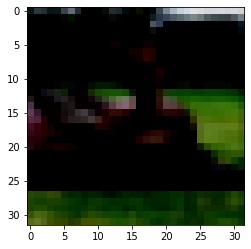

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : ship
img's shape : torch.Size([3, 32, 32])


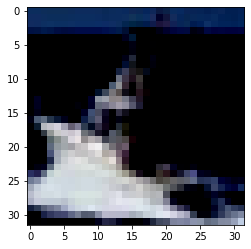

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : horse
img's shape : torch.Size([3, 32, 32])


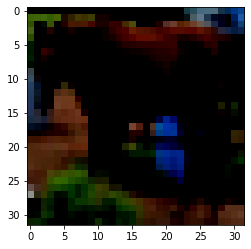


label : frog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


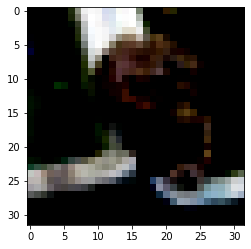


label : truck
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


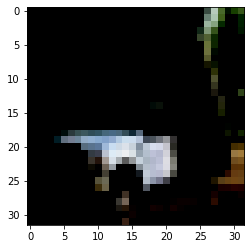


label : airplane
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


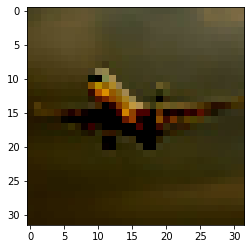


label : horse
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


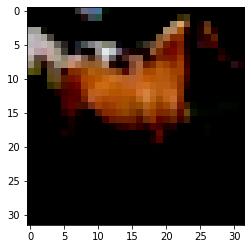

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : airplane
img's shape : torch.Size([3, 32, 32])


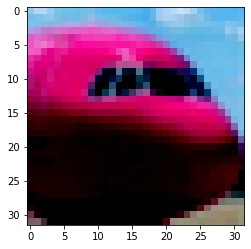


label : ship
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


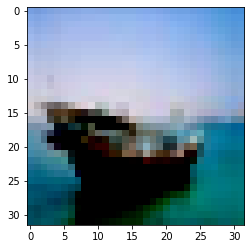


label : truck
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


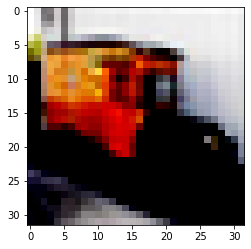


label : cat
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


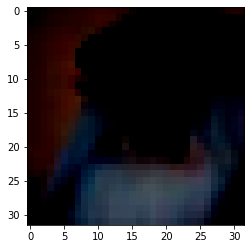


label : ship
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


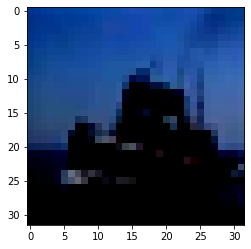

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : cat
img's shape : torch.Size([3, 32, 32])


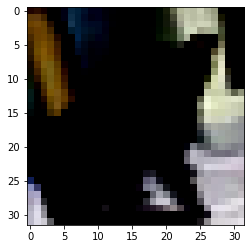

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : frog
img's shape : torch.Size([3, 32, 32])


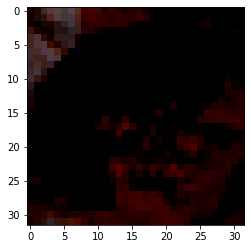


label : deer
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


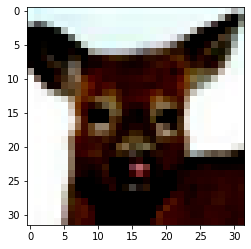


label : automobile
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


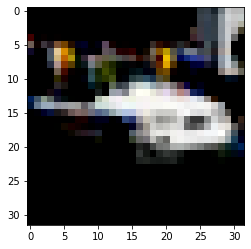


label : horse
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


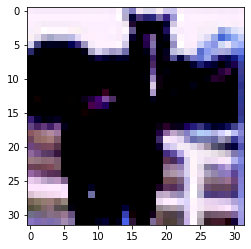

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : frog
img's shape : torch.Size([3, 32, 32])


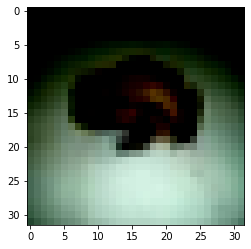

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : bird
img's shape : torch.Size([3, 32, 32])


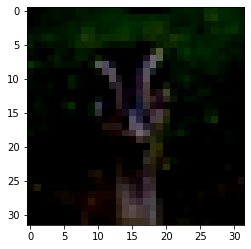

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : ship
img's shape : torch.Size([3, 32, 32])


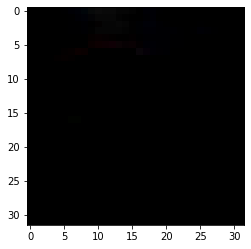

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : automobile
img's shape : torch.Size([3, 32, 32])


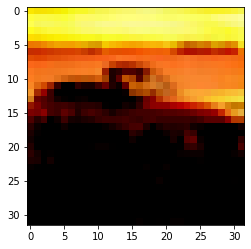

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : frog
img's shape : torch.Size([3, 32, 32])


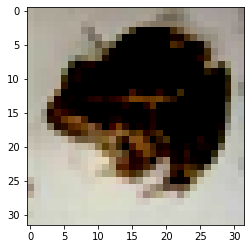


label : automobile
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


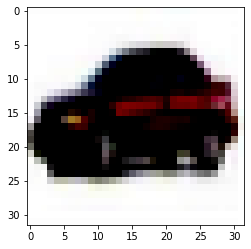


label : dog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


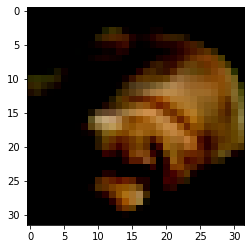


label : ship
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


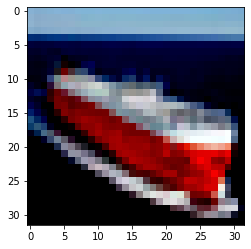


label : truck
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


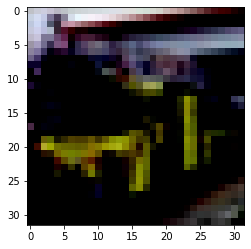


label : airplane
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


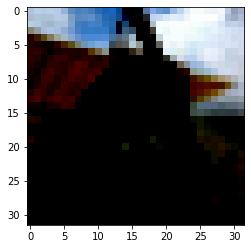


label : automobile
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


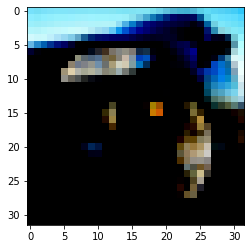


label : frog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


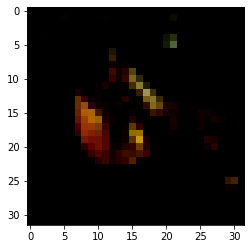

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : ship
img's shape : torch.Size([3, 32, 32])


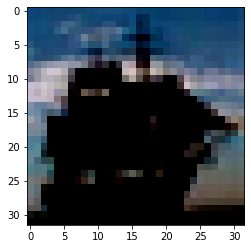

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : deer
img's shape : torch.Size([3, 32, 32])


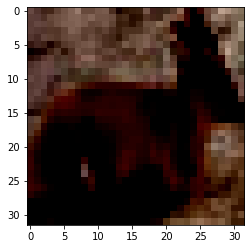


label : ship
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


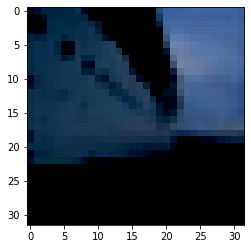


label : cat
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


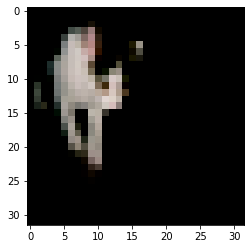

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : cat
img's shape : torch.Size([3, 32, 32])


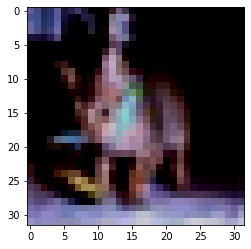


label : airplane
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


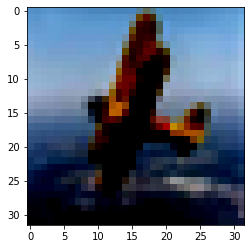

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : bird
img's shape : torch.Size([3, 32, 32])


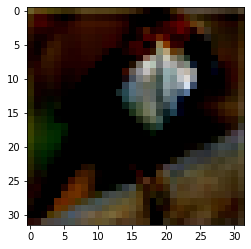


label : bird
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


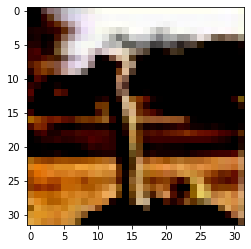

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : ship
img's shape : torch.Size([3, 32, 32])


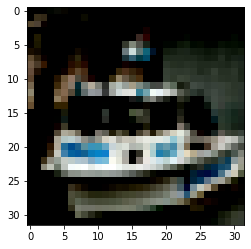


label : dog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


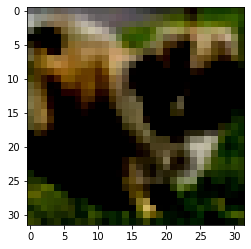


label : bird
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


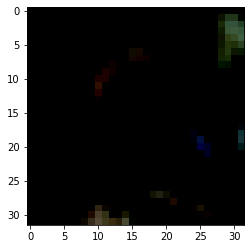

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : airplane
img's shape : torch.Size([3, 32, 32])


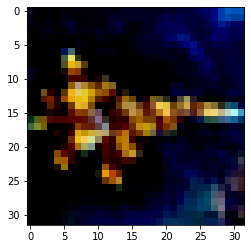

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : truck
img's shape : torch.Size([3, 32, 32])


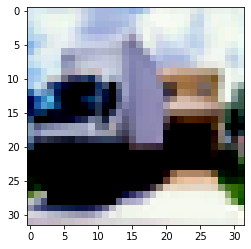


label : ship
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


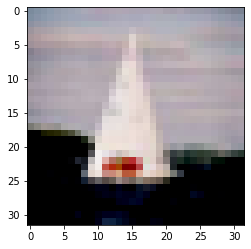


label : automobile
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


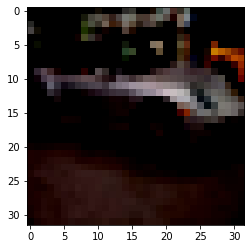


label : truck
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


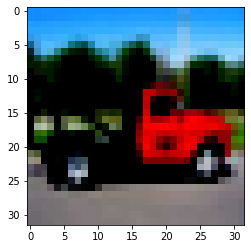


label : frog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


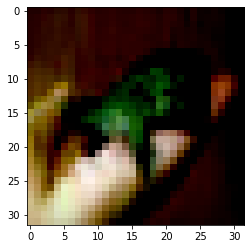


label : bird
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


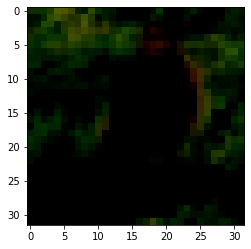


label : airplane
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


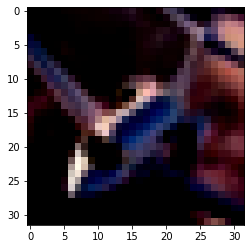


label : horse
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


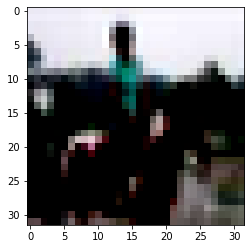


label : dog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


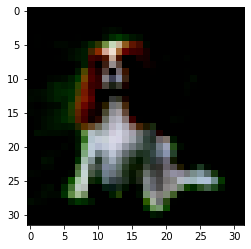

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : airplane
img's shape : torch.Size([3, 32, 32])


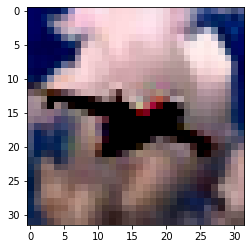


label : bird
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


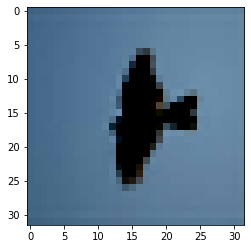

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : horse
img's shape : torch.Size([3, 32, 32])


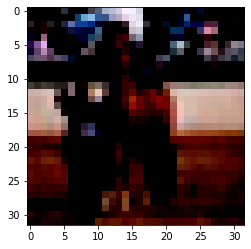


label : frog
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


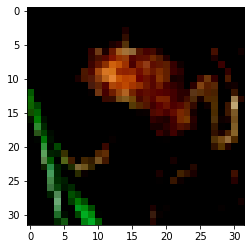

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : ship
img's shape : torch.Size([3, 32, 32])


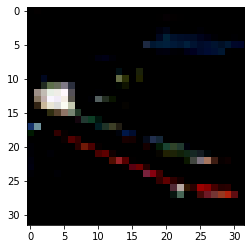


label : truck
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


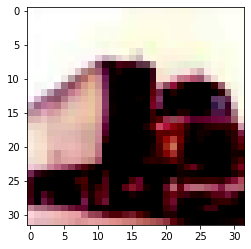


label : automobile
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


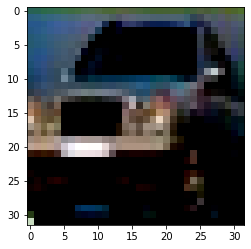


label : bird
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


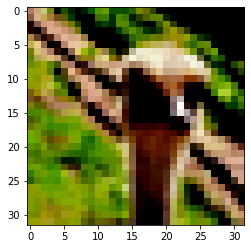


label : truck
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


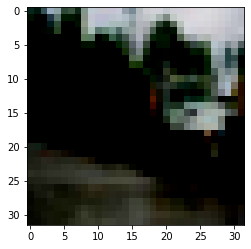

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : horse
img's shape : torch.Size([3, 32, 32])


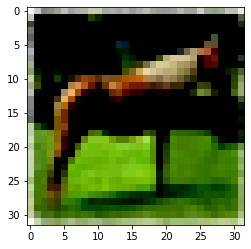


label : deer
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


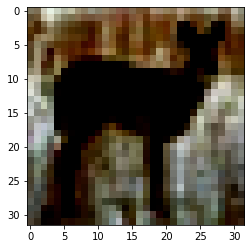

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : deer
img's shape : torch.Size([3, 32, 32])


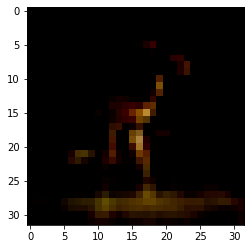


label : cat
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


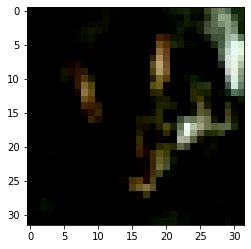

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



label : truck
img's shape : torch.Size([3, 32, 32])


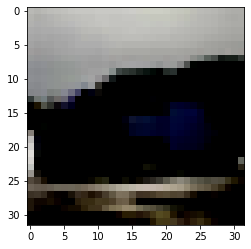

In [4]:
_, (imgs, labels) = list(enumerate(train_loader))[0]

for img, label in zip(imgs, labels):
    print("label :", label_names[label])
    print("img's shape : {}".format(img.shape))
    plt.imshow(np.transpose(img, (1,2,0)))
    plt.show()
    print()

## 학습, 검증 함수 정의

In [5]:
loss_fn = nn.CrossEntropyLoss()

def calc_acc(X, Y):
    x_val, x_idx = torch.max(X, dim=1)
    return (x_idx == Y).sum().item()

def train(EPOCHS, model, train_loader, test_loader, opt):
    train_loss_history = []
    test_loss_history = []
    train_acc_history = []
    test_acc_history = []
    for epoch in range(1, EPOCHS+1):
        model.train()
        train_acc = 0
        print("<<< EPOCH {} >>>".format(epoch))
        for batch_idx, (img,label) in enumerate(notebook.tqdm(train_loader)):
            img, label = img.to(DEVICE), label.to(DEVICE)
            
            output = model(img)                 # 순전파
            loss = loss_fn(output, label)       # 오차 계산
            
            opt.zero_grad()                     # opt내부 값 초기화
            loss.backward()                     # 오차 역전파
            opt.step()                          # 가중치 갱신
            
            train_acc += calc_acc(output, label)
            if batch_idx % 100 == 0 and batch_idx != 0:
                print("Training : [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Acc : {:.3f}".format(
                    batch_idx * len(img), 
                    len(train_loader.dataset), 
                    100. * batch_idx / len(train_loader), 
                    loss.item(),
                    train_acc / len(train_loader.dataset)))
                
        print("Training : [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Acc : {:.3f}".format(
                    len(train_loader.dataset), 
                    len(train_loader.dataset), 
                    100. * batch_idx / len(train_loader), 
                    loss.item(),
                    train_acc / len(train_loader.dataset)))
        t_loss, t_acc = evaluate(model, test_loader)
        print("[{}] Test Loss : {:.4f}\t accuracy: {:.2f}%\n".format(epoch, t_loss, t_acc*100.))

        train_loss_history.append(loss)
        train_acc_history.append(train_acc / len(train_loader.dataset))

        test_loss_history.append(t_loss)
        test_acc_history.append(t_acc)

    return train_loss_history, train_acc_history, test_loss_history, test_acc_history
                
def evaluate(model, test_loader):
    model.eval()
    t_loss = 0
    correct = 0
    
    with torch.no_grad():
        for img, label in notebook.tqdm(test_loader):
            img, label = img.to(DEVICE), label.to(DEVICE)
            
            output = model(img)
            t_loss += loss_fn(output, label)
            
            correct += calc_acc(output, label)

    t_loss /= len(test_loader)
    t_acc = correct / len(test_loader.dataset)
    return t_loss, t_acc

## 모델 정의

### ResNet

In [16]:
import torchvision.models as models

class MyResNet(nn.Module):
    def __init__(self):
        super(MyResNet, self).__init__()

        self.model = models.resnet18(pretrained=True).to(DEVICE)
        self.model = torch.nn.Sequential(*(list(self.model.children())[:-2])) # FC Layer(분류기)를 제외한 특징 추출부분

        self.fc1 = nn.Linear(512 , 64)
        self.fc2 = nn.Linear(64, 10)

        self.act_fn = nn.ReLU()

    def forward(self, x):
        x = self.model(x)               # (batch, 3, 28, 28) -> (batch, 512, 1, 1)
        x = x.view(-1, 512)             #(batch, 512, 1, 1) -> (batch, 512)

        x = self.fc1(x)
        x = self.act_fn(x)

        x = self.fc2(x)
        return x

### VGG

In [50]:
import torchvision.models as models

class MyVGGNet(nn.Module):
    def __init__(self):
        super(MyVGGNet, self).__init__()

        self.model = models.vgg16(pretrained=True).to(DEVICE)
        self.model = torch.nn.Sequential(*(list(self.model.children())[:-2])) # FC Layer(분류기)를 제외한 특징 추출부분

        self.fc1 = nn.Linear(512 , 64)
        self.fc2 = nn.Linear(64, 10)

        self.act_fn = nn.ReLU()

    def forward(self, x):
        x = self.model(x)               # (batch, 3, 28, 28) -> (batch, 512, 1, 1)\
        x = x.view(-1, 512*1*1)             #(batch, 512, 1, 1) -> (batch, 512)

        x = self.fc1(x)
        x = self.act_fn(x)

        x = self.fc2(x)
        return x

## 학습 & 검증

### ResNet

In [17]:
model = MyResNet().to(DEVICE)
opt = optim.Adam(model.parameters())
print("DEVICE: ", DEVICE)
print("MODEL: ", model)
print("model's number of Parameters: ", sum([p.numel() for p in model.parameters()]))

DEVICE:  cuda
MODEL:  MyResNet(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [18]:
t_loss_his, t_acc_his, v_loss_his, v_acc_his = train(EPOCHS = 15, model = model, train_loader = train_loader, test_loader = test_loader, opt = opt)

<<< EPOCH 1 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 1.685166	 Acc : 0.068
Training : [12800/50000 (26%)]	Loss: 1.240475	 Acc : 0.149
Training : [19200/50000 (38%)]	Loss: 0.735835	 Acc : 0.234
Training : [25600/50000 (51%)]	Loss: 1.010351	 Acc : 0.322
Training : [32000/50000 (64%)]	Loss: 0.949038	 Acc : 0.411
Training : [38400/50000 (77%)]	Loss: 0.913323	 Acc : 0.505
Training : [44800/50000 (90%)]	Loss: 0.629938	 Acc : 0.598
Training : [50000/50000 (100%)]	Loss: 1.779987	 Acc : 0.674


  0%|          | 0/157 [00:00<?, ?it/s]

[1] Test Loss : 0.9207	 accuracy: 70.22%

<<< EPOCH 2 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.618450	 Acc : 0.098
Training : [12800/50000 (26%)]	Loss: 0.798125	 Acc : 0.195
Training : [19200/50000 (38%)]	Loss: 0.528515	 Acc : 0.294
Training : [25600/50000 (51%)]	Loss: 0.771232	 Acc : 0.394
Training : [32000/50000 (64%)]	Loss: 0.772182	 Acc : 0.492
Training : [38400/50000 (77%)]	Loss: 0.708440	 Acc : 0.591
Training : [44800/50000 (90%)]	Loss: 0.500714	 Acc : 0.689
Training : [50000/50000 (100%)]	Loss: 1.680109	 Acc : 0.770


  0%|          | 0/157 [00:00<?, ?it/s]

[2] Test Loss : 0.6784	 accuracy: 77.19%

<<< EPOCH 3 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.621425	 Acc : 0.102
Training : [12800/50000 (26%)]	Loss: 0.479805	 Acc : 0.205
Training : [19200/50000 (38%)]	Loss: 0.432921	 Acc : 0.308
Training : [25600/50000 (51%)]	Loss: 0.815301	 Acc : 0.410
Training : [32000/50000 (64%)]	Loss: 0.511968	 Acc : 0.513
Training : [38400/50000 (77%)]	Loss: 0.654313	 Acc : 0.618
Training : [44800/50000 (90%)]	Loss: 0.495440	 Acc : 0.722
Training : [50000/50000 (100%)]	Loss: 0.821053	 Acc : 0.806


  0%|          | 0/157 [00:00<?, ?it/s]

[3] Test Loss : 0.5996	 accuracy: 79.52%

<<< EPOCH 4 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.599368	 Acc : 0.107
Training : [12800/50000 (26%)]	Loss: 0.547319	 Acc : 0.214
Training : [19200/50000 (38%)]	Loss: 0.546281	 Acc : 0.321
Training : [25600/50000 (51%)]	Loss: 0.517397	 Acc : 0.427
Training : [32000/50000 (64%)]	Loss: 0.491249	 Acc : 0.532
Training : [38400/50000 (77%)]	Loss: 0.439915	 Acc : 0.638
Training : [44800/50000 (90%)]	Loss: 0.556293	 Acc : 0.744
Training : [50000/50000 (100%)]	Loss: 0.883669	 Acc : 0.830


  0%|          | 0/157 [00:00<?, ?it/s]

[4] Test Loss : 0.6112	 accuracy: 79.99%

<<< EPOCH 5 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.512315	 Acc : 0.110
Training : [12800/50000 (26%)]	Loss: 0.413413	 Acc : 0.219
Training : [19200/50000 (38%)]	Loss: 0.423199	 Acc : 0.328
Training : [25600/50000 (51%)]	Loss: 0.577796	 Acc : 0.437
Training : [32000/50000 (64%)]	Loss: 0.595245	 Acc : 0.545
Training : [38400/50000 (77%)]	Loss: 0.475793	 Acc : 0.654
Training : [44800/50000 (90%)]	Loss: 0.569385	 Acc : 0.762
Training : [50000/50000 (100%)]	Loss: 1.074270	 Acc : 0.849


  0%|          | 0/157 [00:00<?, ?it/s]

[5] Test Loss : 0.5599	 accuracy: 81.49%

<<< EPOCH 6 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.304503	 Acc : 0.113
Training : [12800/50000 (26%)]	Loss: 0.361079	 Acc : 0.224
Training : [19200/50000 (38%)]	Loss: 0.337326	 Acc : 0.336
Training : [25600/50000 (51%)]	Loss: 0.445561	 Acc : 0.446
Training : [32000/50000 (64%)]	Loss: 0.389000	 Acc : 0.557
Training : [38400/50000 (77%)]	Loss: 0.302981	 Acc : 0.668
Training : [44800/50000 (90%)]	Loss: 0.606894	 Acc : 0.780
Training : [50000/50000 (100%)]	Loss: 0.638719	 Acc : 0.868


  0%|          | 0/157 [00:00<?, ?it/s]

[6] Test Loss : 0.5696	 accuracy: 81.47%

<<< EPOCH 7 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.575818	 Acc : 0.115
Training : [12800/50000 (26%)]	Loss: 0.186982	 Acc : 0.227
Training : [19200/50000 (38%)]	Loss: 0.208802	 Acc : 0.340
Training : [25600/50000 (51%)]	Loss: 0.185209	 Acc : 0.453
Training : [32000/50000 (64%)]	Loss: 0.218913	 Acc : 0.565
Training : [38400/50000 (77%)]	Loss: 0.324163	 Acc : 0.676
Training : [44800/50000 (90%)]	Loss: 0.249304	 Acc : 0.789
Training : [50000/50000 (100%)]	Loss: 0.539544	 Acc : 0.879


  0%|          | 0/157 [00:00<?, ?it/s]

[7] Test Loss : 0.6131	 accuracy: 80.40%

<<< EPOCH 8 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.384918	 Acc : 0.115
Training : [12800/50000 (26%)]	Loss: 0.159303	 Acc : 0.229
Training : [19200/50000 (38%)]	Loss: 0.467763	 Acc : 0.344
Training : [25600/50000 (51%)]	Loss: 0.134719	 Acc : 0.458
Training : [32000/50000 (64%)]	Loss: 0.300520	 Acc : 0.572
Training : [38400/50000 (77%)]	Loss: 0.267201	 Acc : 0.686
Training : [44800/50000 (90%)]	Loss: 0.142377	 Acc : 0.801
Training : [50000/50000 (100%)]	Loss: 1.099405	 Acc : 0.892


  0%|          | 0/157 [00:00<?, ?it/s]

[8] Test Loss : 0.5602	 accuracy: 82.17%

<<< EPOCH 9 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.355900	 Acc : 0.117
Training : [12800/50000 (26%)]	Loss: 0.266627	 Acc : 0.233
Training : [19200/50000 (38%)]	Loss: 0.361405	 Acc : 0.350
Training : [25600/50000 (51%)]	Loss: 0.250189	 Acc : 0.465
Training : [32000/50000 (64%)]	Loss: 0.244851	 Acc : 0.581
Training : [38400/50000 (77%)]	Loss: 0.193834	 Acc : 0.697
Training : [44800/50000 (90%)]	Loss: 0.287281	 Acc : 0.812
Training : [50000/50000 (100%)]	Loss: 0.282608	 Acc : 0.904


  0%|          | 0/157 [00:00<?, ?it/s]

[9] Test Loss : 0.5802	 accuracy: 81.82%

<<< EPOCH 10 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.272094	 Acc : 0.119
Training : [12800/50000 (26%)]	Loss: 0.214946	 Acc : 0.237
Training : [19200/50000 (38%)]	Loss: 0.249829	 Acc : 0.354
Training : [25600/50000 (51%)]	Loss: 0.287945	 Acc : 0.471
Training : [32000/50000 (64%)]	Loss: 0.366707	 Acc : 0.588
Training : [38400/50000 (77%)]	Loss: 0.172871	 Acc : 0.705
Training : [44800/50000 (90%)]	Loss: 0.150886	 Acc : 0.821
Training : [50000/50000 (100%)]	Loss: 0.251685	 Acc : 0.915


  0%|          | 0/157 [00:00<?, ?it/s]

[10] Test Loss : 0.5958	 accuracy: 81.56%

<<< EPOCH 11 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.141769	 Acc : 0.120
Training : [12800/50000 (26%)]	Loss: 0.254740	 Acc : 0.239
Training : [19200/50000 (38%)]	Loss: 0.287784	 Acc : 0.357
Training : [25600/50000 (51%)]	Loss: 0.082682	 Acc : 0.476
Training : [32000/50000 (64%)]	Loss: 0.162968	 Acc : 0.593
Training : [38400/50000 (77%)]	Loss: 0.261449	 Acc : 0.710
Training : [44800/50000 (90%)]	Loss: 0.295112	 Acc : 0.827
Training : [50000/50000 (100%)]	Loss: 0.187440	 Acc : 0.922


  0%|          | 0/157 [00:00<?, ?it/s]

[11] Test Loss : 0.5637	 accuracy: 82.75%

<<< EPOCH 12 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.152532	 Acc : 0.121
Training : [12800/50000 (26%)]	Loss: 0.069198	 Acc : 0.241
Training : [19200/50000 (38%)]	Loss: 0.300846	 Acc : 0.360
Training : [25600/50000 (51%)]	Loss: 0.032246	 Acc : 0.479
Training : [32000/50000 (64%)]	Loss: 0.157375	 Acc : 0.598
Training : [38400/50000 (77%)]	Loss: 0.093041	 Acc : 0.716
Training : [44800/50000 (90%)]	Loss: 0.268088	 Acc : 0.834
Training : [50000/50000 (100%)]	Loss: 0.181537	 Acc : 0.929


  0%|          | 0/157 [00:00<?, ?it/s]

[12] Test Loss : 0.5368	 accuracy: 83.66%

<<< EPOCH 13 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.166527	 Acc : 0.123
Training : [12800/50000 (26%)]	Loss: 0.106596	 Acc : 0.243
Training : [19200/50000 (38%)]	Loss: 0.132117	 Acc : 0.363
Training : [25600/50000 (51%)]	Loss: 0.163448	 Acc : 0.483
Training : [32000/50000 (64%)]	Loss: 0.185522	 Acc : 0.602
Training : [38400/50000 (77%)]	Loss: 0.136395	 Acc : 0.721
Training : [44800/50000 (90%)]	Loss: 0.094815	 Acc : 0.841
Training : [50000/50000 (100%)]	Loss: 0.022016	 Acc : 0.937


  0%|          | 0/157 [00:00<?, ?it/s]

[13] Test Loss : 0.5896	 accuracy: 83.08%

<<< EPOCH 14 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.148596	 Acc : 0.123
Training : [12800/50000 (26%)]	Loss: 0.075720	 Acc : 0.245
Training : [19200/50000 (38%)]	Loss: 0.166110	 Acc : 0.365
Training : [25600/50000 (51%)]	Loss: 0.277444	 Acc : 0.485
Training : [32000/50000 (64%)]	Loss: 0.321210	 Acc : 0.606
Training : [38400/50000 (77%)]	Loss: 0.136944	 Acc : 0.726
Training : [44800/50000 (90%)]	Loss: 0.318773	 Acc : 0.846
Training : [50000/50000 (100%)]	Loss: 0.342835	 Acc : 0.942


  0%|          | 0/157 [00:00<?, ?it/s]

[14] Test Loss : 0.6146	 accuracy: 82.39%

<<< EPOCH 15 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.083542	 Acc : 0.122
Training : [12800/50000 (26%)]	Loss: 0.114891	 Acc : 0.244
Training : [19200/50000 (38%)]	Loss: 0.041481	 Acc : 0.365
Training : [25600/50000 (51%)]	Loss: 0.255266	 Acc : 0.486
Training : [32000/50000 (64%)]	Loss: 0.132759	 Acc : 0.607
Training : [38400/50000 (77%)]	Loss: 0.099324	 Acc : 0.728
Training : [44800/50000 (90%)]	Loss: 0.149731	 Acc : 0.849
Training : [50000/50000 (100%)]	Loss: 0.042261	 Acc : 0.946


  0%|          | 0/157 [00:00<?, ?it/s]

[15] Test Loss : 0.5999	 accuracy: 83.23%



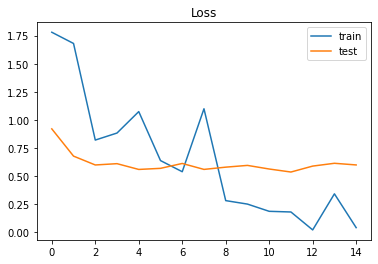

In [19]:
plt.plot(t_loss_his, label="train")
plt.plot(v_loss_his, label="test")
plt.title("Loss")
plt.legend()
plt.show()

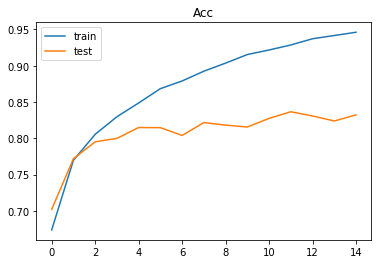

In [20]:
plt.plot(t_acc_his, label="train")
plt.plot(v_acc_his, label="test")
plt.title("Acc")
plt.legend()
plt.show()

In [21]:
t_loss, t_acc = evaluate(model, test_loader)
print("Test Loss : {:.4f}\t accuracy: {:.2f}%\n".format(t_loss, t_acc*100.))

  0%|          | 0/157 [00:00<?, ?it/s]

Test Loss : 0.5936	 accuracy: 83.39%



### VGG

In [51]:
model = MyVGGNet().to(DEVICE)
opt = optim.Adam(model.parameters())
print("DEVICE: ", DEVICE)
print("MODEL: ", model)
print("model's number of Parameters: ", sum([p.numel() for p in model.parameters()]))

DEVICE:  cuda
MODEL:  MyVGGNet(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inp

In [52]:
t_loss_his, t_acc_his, v_loss_his, v_acc_his = train(EPOCHS = 15, model = model, train_loader = train_loader, test_loader = test_loader, opt = opt)

<<< EPOCH 1 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 1.791873	 Acc : 0.021
Training : [12800/50000 (26%)]	Loss: 1.585834	 Acc : 0.053
Training : [19200/50000 (38%)]	Loss: 1.461854	 Acc : 0.100
Training : [25600/50000 (51%)]	Loss: 1.406067	 Acc : 0.157
Training : [32000/50000 (64%)]	Loss: 1.102121	 Acc : 0.222
Training : [38400/50000 (77%)]	Loss: 0.862784	 Acc : 0.295
Training : [44800/50000 (90%)]	Loss: 0.972818	 Acc : 0.373
Training : [50000/50000 (100%)]	Loss: 1.051177	 Acc : 0.439


  0%|          | 0/157 [00:00<?, ?it/s]

[1] Test Loss : 1.1017	 accuracy: 61.73%

<<< EPOCH 2 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.757158	 Acc : 0.088
Training : [12800/50000 (26%)]	Loss: 0.820005	 Acc : 0.179
Training : [19200/50000 (38%)]	Loss: 1.013954	 Acc : 0.271
Training : [25600/50000 (51%)]	Loss: 0.527587	 Acc : 0.366
Training : [32000/50000 (64%)]	Loss: 0.695721	 Acc : 0.461
Training : [38400/50000 (77%)]	Loss: 0.607053	 Acc : 0.560
Training : [44800/50000 (90%)]	Loss: 0.912502	 Acc : 0.656
Training : [50000/50000 (100%)]	Loss: 0.800509	 Acc : 0.736


  0%|          | 0/157 [00:00<?, ?it/s]

[2] Test Loss : 0.7953	 accuracy: 74.83%

<<< EPOCH 3 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.460926	 Acc : 0.100
Training : [12800/50000 (26%)]	Loss: 0.329660	 Acc : 0.202
Training : [19200/50000 (38%)]	Loss: 0.691485	 Acc : 0.305
Training : [25600/50000 (51%)]	Loss: 0.645500	 Acc : 0.408
Training : [32000/50000 (64%)]	Loss: 0.487815	 Acc : 0.513
Training : [38400/50000 (77%)]	Loss: 0.390857	 Acc : 0.616
Training : [44800/50000 (90%)]	Loss: 0.634815	 Acc : 0.720
Training : [50000/50000 (100%)]	Loss: 0.622905	 Acc : 0.802


  0%|          | 0/157 [00:00<?, ?it/s]

[3] Test Loss : 0.6678	 accuracy: 78.55%

<<< EPOCH 4 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.623487	 Acc : 0.106
Training : [12800/50000 (26%)]	Loss: 0.394754	 Acc : 0.213
Training : [19200/50000 (38%)]	Loss: 0.574219	 Acc : 0.321
Training : [25600/50000 (51%)]	Loss: 0.389079	 Acc : 0.427
Training : [32000/50000 (64%)]	Loss: 0.418210	 Acc : 0.535
Training : [38400/50000 (77%)]	Loss: 0.352532	 Acc : 0.641
Training : [44800/50000 (90%)]	Loss: 0.350833	 Acc : 0.748
Training : [50000/50000 (100%)]	Loss: 0.638966	 Acc : 0.834


  0%|          | 0/157 [00:00<?, ?it/s]

[4] Test Loss : 0.5961	 accuracy: 81.33%

<<< EPOCH 5 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.402499	 Acc : 0.110
Training : [12800/50000 (26%)]	Loss: 0.425657	 Acc : 0.219
Training : [19200/50000 (38%)]	Loss: 0.531133	 Acc : 0.327
Training : [25600/50000 (51%)]	Loss: 0.311729	 Acc : 0.437
Training : [32000/50000 (64%)]	Loss: 0.726912	 Acc : 0.547
Training : [38400/50000 (77%)]	Loss: 0.311314	 Acc : 0.658
Training : [44800/50000 (90%)]	Loss: 0.372136	 Acc : 0.768
Training : [50000/50000 (100%)]	Loss: 0.390713	 Acc : 0.855


  0%|          | 0/157 [00:00<?, ?it/s]

[5] Test Loss : 0.5476	 accuracy: 83.16%

<<< EPOCH 6 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.432930	 Acc : 0.113
Training : [12800/50000 (26%)]	Loss: 0.577529	 Acc : 0.225
Training : [19200/50000 (38%)]	Loss: 0.310024	 Acc : 0.336
Training : [25600/50000 (51%)]	Loss: 0.228748	 Acc : 0.448
Training : [32000/50000 (64%)]	Loss: 0.326694	 Acc : 0.559
Training : [38400/50000 (77%)]	Loss: 0.380727	 Acc : 0.670
Training : [44800/50000 (90%)]	Loss: 0.390437	 Acc : 0.781
Training : [50000/50000 (100%)]	Loss: 0.515756	 Acc : 0.869


  0%|          | 0/157 [00:00<?, ?it/s]

[6] Test Loss : 0.5783	 accuracy: 81.99%

<<< EPOCH 7 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.396502	 Acc : 0.115
Training : [12800/50000 (26%)]	Loss: 0.494581	 Acc : 0.230
Training : [19200/50000 (38%)]	Loss: 0.207492	 Acc : 0.344
Training : [25600/50000 (51%)]	Loss: 0.423946	 Acc : 0.458
Training : [32000/50000 (64%)]	Loss: 0.434532	 Acc : 0.571
Training : [38400/50000 (77%)]	Loss: 0.318778	 Acc : 0.685
Training : [44800/50000 (90%)]	Loss: 0.324222	 Acc : 0.798
Training : [50000/50000 (100%)]	Loss: 0.606503	 Acc : 0.889


  0%|          | 0/157 [00:00<?, ?it/s]

[7] Test Loss : 0.6026	 accuracy: 81.81%

<<< EPOCH 8 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.446367	 Acc : 0.115
Training : [12800/50000 (26%)]	Loss: 0.397859	 Acc : 0.230
Training : [19200/50000 (38%)]	Loss: 0.369444	 Acc : 0.344
Training : [25600/50000 (51%)]	Loss: 0.239344	 Acc : 0.458
Training : [32000/50000 (64%)]	Loss: 0.213018	 Acc : 0.572
Training : [38400/50000 (77%)]	Loss: 0.313049	 Acc : 0.686
Training : [44800/50000 (90%)]	Loss: 0.547749	 Acc : 0.800
Training : [50000/50000 (100%)]	Loss: 0.229108	 Acc : 0.891


  0%|          | 0/157 [00:00<?, ?it/s]

[8] Test Loss : 0.5819	 accuracy: 83.36%

<<< EPOCH 9 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.255759	 Acc : 0.118
Training : [12800/50000 (26%)]	Loss: 0.364053	 Acc : 0.233
Training : [19200/50000 (38%)]	Loss: 0.464183	 Acc : 0.349
Training : [25600/50000 (51%)]	Loss: 0.500354	 Acc : 0.464
Training : [32000/50000 (64%)]	Loss: 0.401387	 Acc : 0.579
Training : [38400/50000 (77%)]	Loss: 0.688959	 Acc : 0.694
Training : [44800/50000 (90%)]	Loss: 0.367775	 Acc : 0.810
Training : [50000/50000 (100%)]	Loss: 0.065970	 Acc : 0.902


  0%|          | 0/157 [00:00<?, ?it/s]

[9] Test Loss : 0.4974	 accuracy: 85.55%

<<< EPOCH 10 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.316795	 Acc : 0.118
Training : [12800/50000 (26%)]	Loss: 0.470674	 Acc : 0.235
Training : [19200/50000 (38%)]	Loss: 0.170091	 Acc : 0.352
Training : [25600/50000 (51%)]	Loss: 0.421359	 Acc : 0.466
Training : [32000/50000 (64%)]	Loss: 0.222713	 Acc : 0.582
Training : [38400/50000 (77%)]	Loss: 0.369756	 Acc : 0.698
Training : [44800/50000 (90%)]	Loss: 0.375990	 Acc : 0.814
Training : [50000/50000 (100%)]	Loss: 0.765394	 Acc : 0.907


  0%|          | 0/157 [00:00<?, ?it/s]

[10] Test Loss : 0.4997	 accuracy: 86.20%

<<< EPOCH 11 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.148756	 Acc : 0.119
Training : [12800/50000 (26%)]	Loss: 0.202622	 Acc : 0.237
Training : [19200/50000 (38%)]	Loss: 0.590026	 Acc : 0.352
Training : [25600/50000 (51%)]	Loss: 0.520894	 Acc : 0.469
Training : [32000/50000 (64%)]	Loss: 0.178268	 Acc : 0.586
Training : [38400/50000 (77%)]	Loss: 0.345592	 Acc : 0.703
Training : [44800/50000 (90%)]	Loss: 0.345967	 Acc : 0.820
Training : [50000/50000 (100%)]	Loss: 0.112782	 Acc : 0.913


  0%|          | 0/157 [00:00<?, ?it/s]

[11] Test Loss : 0.5234	 accuracy: 84.95%

<<< EPOCH 12 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.429281	 Acc : 0.119
Training : [12800/50000 (26%)]	Loss: 0.349695	 Acc : 0.237
Training : [19200/50000 (38%)]	Loss: 0.234969	 Acc : 0.354
Training : [25600/50000 (51%)]	Loss: 0.300149	 Acc : 0.472
Training : [32000/50000 (64%)]	Loss: 0.197725	 Acc : 0.590
Training : [38400/50000 (77%)]	Loss: 0.290409	 Acc : 0.706
Training : [44800/50000 (90%)]	Loss: 0.400157	 Acc : 0.824
Training : [50000/50000 (100%)]	Loss: 0.611638	 Acc : 0.917


  0%|          | 0/157 [00:00<?, ?it/s]

[12] Test Loss : 0.5398	 accuracy: 85.54%

<<< EPOCH 13 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.277660	 Acc : 0.119
Training : [12800/50000 (26%)]	Loss: 0.399842	 Acc : 0.237
Training : [19200/50000 (38%)]	Loss: 0.261445	 Acc : 0.356
Training : [25600/50000 (51%)]	Loss: 0.128397	 Acc : 0.474
Training : [32000/50000 (64%)]	Loss: 0.280615	 Acc : 0.593
Training : [38400/50000 (77%)]	Loss: 0.368335	 Acc : 0.712
Training : [44800/50000 (90%)]	Loss: 0.225932	 Acc : 0.828
Training : [50000/50000 (100%)]	Loss: 0.141825	 Acc : 0.921


  0%|          | 0/157 [00:00<?, ?it/s]

[13] Test Loss : 0.5486	 accuracy: 85.01%

<<< EPOCH 14 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.339877	 Acc : 0.120
Training : [12800/50000 (26%)]	Loss: 0.304593	 Acc : 0.239
Training : [19200/50000 (38%)]	Loss: 0.329609	 Acc : 0.358
Training : [25600/50000 (51%)]	Loss: 0.404021	 Acc : 0.476
Training : [32000/50000 (64%)]	Loss: 0.338948	 Acc : 0.595
Training : [38400/50000 (77%)]	Loss: 0.128131	 Acc : 0.714
Training : [44800/50000 (90%)]	Loss: 0.245000	 Acc : 0.833
Training : [50000/50000 (100%)]	Loss: 0.234237	 Acc : 0.928


  0%|          | 0/157 [00:00<?, ?it/s]

[14] Test Loss : 0.5224	 accuracy: 85.59%

<<< EPOCH 15 >>>


  0%|          | 0/782 [00:00<?, ?it/s]

Training : [6400/50000 (13%)]	Loss: 0.208710	 Acc : 0.122
Training : [12800/50000 (26%)]	Loss: 0.197671	 Acc : 0.241
Training : [19200/50000 (38%)]	Loss: 0.225743	 Acc : 0.361
Training : [25600/50000 (51%)]	Loss: 0.237501	 Acc : 0.481
Training : [32000/50000 (64%)]	Loss: 0.108148	 Acc : 0.599
Training : [38400/50000 (77%)]	Loss: 0.197487	 Acc : 0.718
Training : [44800/50000 (90%)]	Loss: 0.179738	 Acc : 0.837
Training : [50000/50000 (100%)]	Loss: 0.154522	 Acc : 0.932


  0%|          | 0/157 [00:00<?, ?it/s]

[15] Test Loss : 0.5383	 accuracy: 85.04%



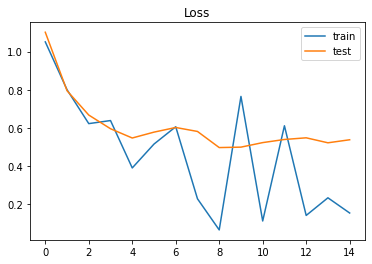

In [53]:
plt.plot(t_loss_his, label="train")
plt.plot(v_loss_his, label="test")
plt.title("Loss")
plt.legend()
plt.show()

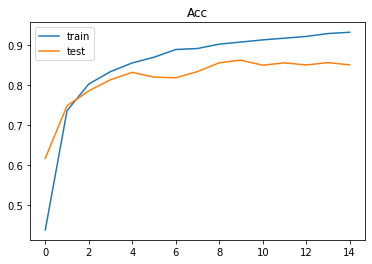

In [54]:
plt.plot(t_acc_his, label="train")
plt.plot(v_acc_his, label="test")
plt.title("Acc")
plt.legend()
plt.show()

In [55]:
t_loss, t_acc = evaluate(model, test_loader)
print("Test Loss : {:.4f}\t accuracy: {:.2f}%\n".format(t_loss, t_acc*100.))

  0%|          | 0/157 [00:00<?, ?it/s]

Test Loss : 0.5471	 accuracy: 85.41%



## 분류 성능 직접 확인하기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


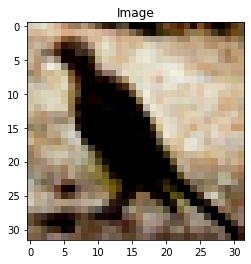

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


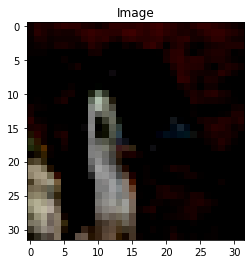

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : dog
예측값 : bird
img's shape : torch.Size([3, 32, 32])


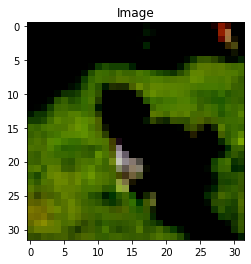

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : deer
예측값 : bird
img's shape : torch.Size([3, 32, 32])


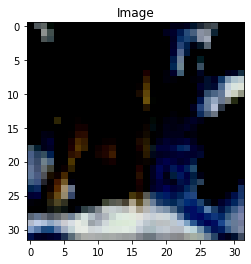


실제값 : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


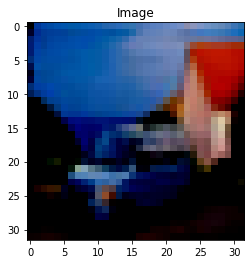


실제값 : bird
예측값 : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird
img's shape : torch.Size([3, 32, 32])


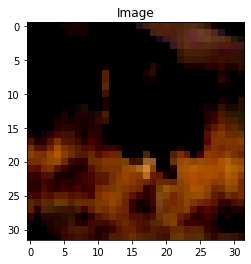

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : truck
예측값 : truck
img's shape : torch.Size([3, 32, 32])


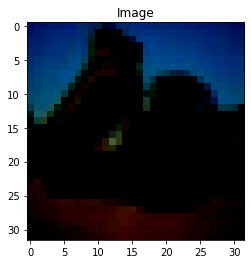

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


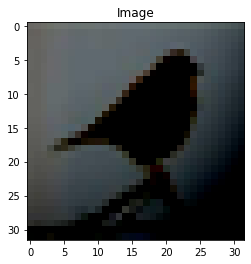

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


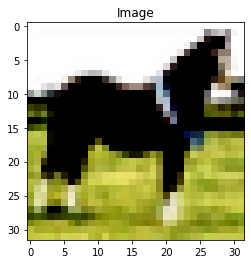


실제값 : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


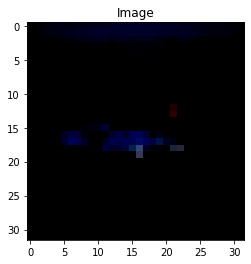

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


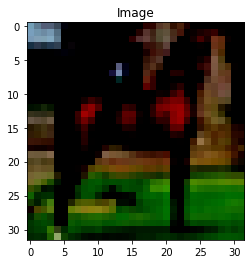

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


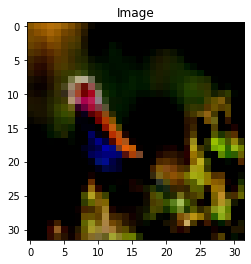

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


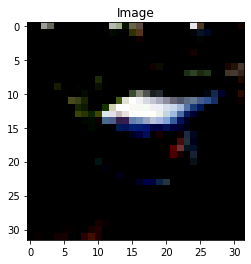

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : cat
예측값 : cat
img's shape : torch.Size([3, 32, 32])


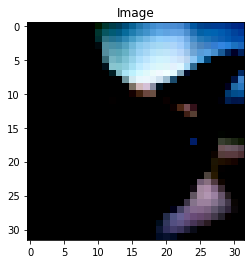

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


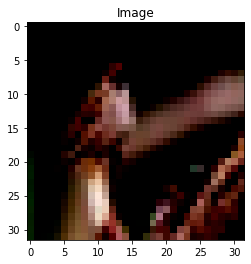

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


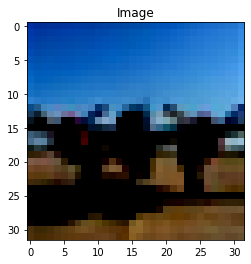

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


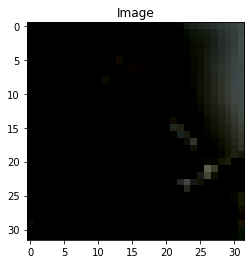


실제값 : deer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측값 : deer
img's shape : torch.Size([3, 32, 32])


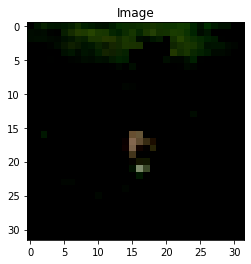

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : horse
예측값 : cat
img's shape : torch.Size([3, 32, 32])


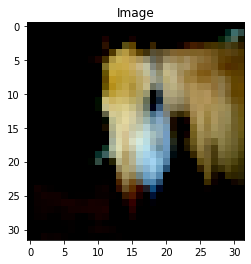

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : truck
예측값 : truck
img's shape : torch.Size([3, 32, 32])


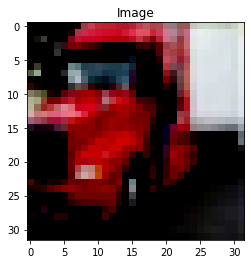

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : ship
예측값 : ship
img's shape : torch.Size([3, 32, 32])


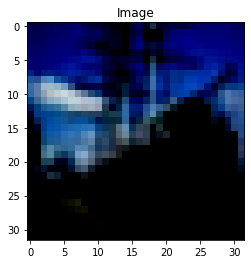

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : truck
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


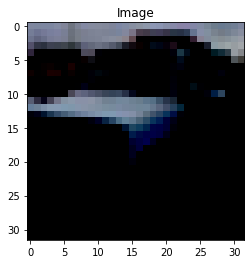


실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


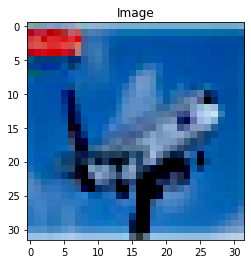

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


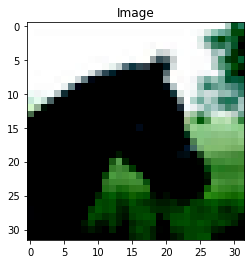

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


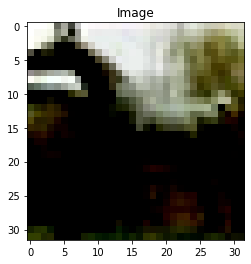


실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


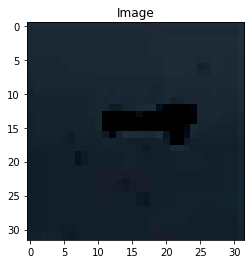

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


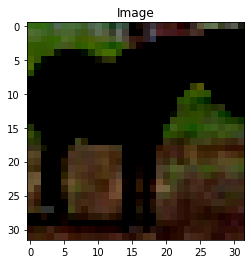

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : ship
예측값 : ship
img's shape : torch.Size([3, 32, 32])


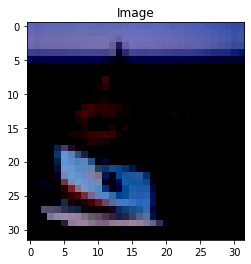


실제값 : deer
예측값 : deer
img's shape : torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


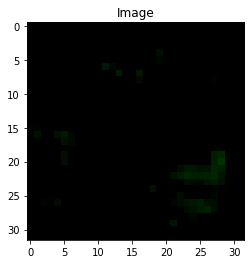

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : frog
예측값 : frog
img's shape : torch.Size([3, 32, 32])


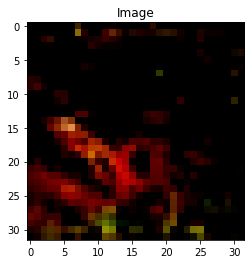

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : cat
예측값 : frog
img's shape : torch.Size([3, 32, 32])


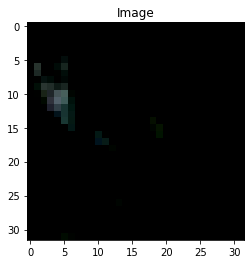

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : cat
예측값 : cat
img's shape : torch.Size([3, 32, 32])


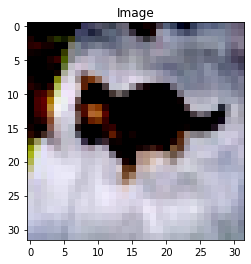

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


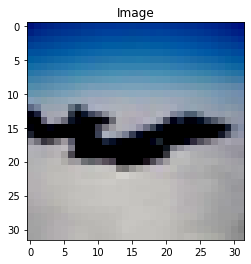

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


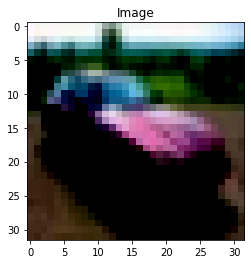

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : cat
예측값 : cat
img's shape : torch.Size([3, 32, 32])


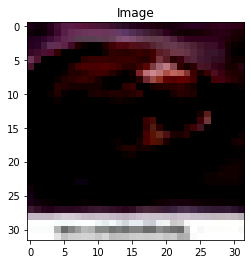

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


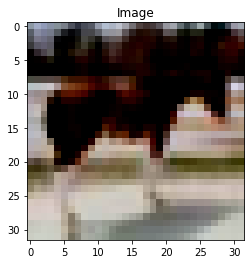

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


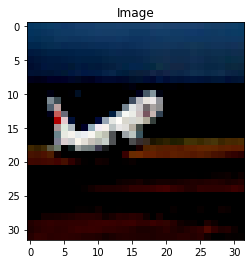

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


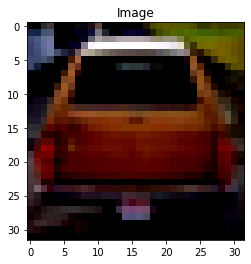

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : cat
예측값 : cat
img's shape : torch.Size([3, 32, 32])


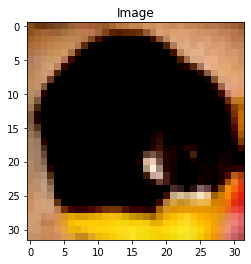

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


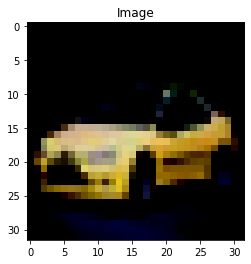

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : deer
예측값 : deer
img's shape : torch.Size([3, 32, 32])


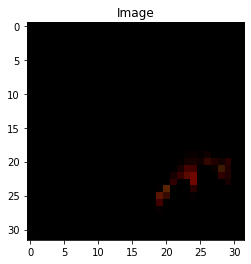

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


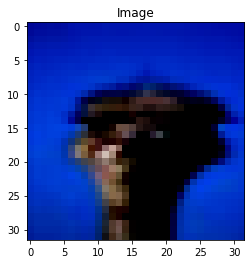

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : cat
예측값 : cat
img's shape : torch.Size([3, 32, 32])


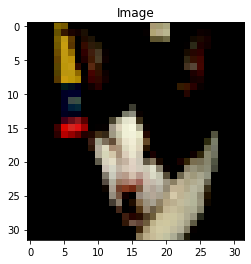

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : ship
예측값 : ship
img's shape : torch.Size([3, 32, 32])


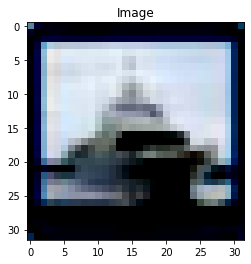

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : deer
예측값 : deer
img's shape : torch.Size([3, 32, 32])


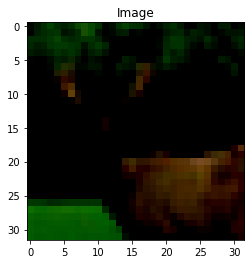

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : bird
예측값 : bird
img's shape : torch.Size([3, 32, 32])


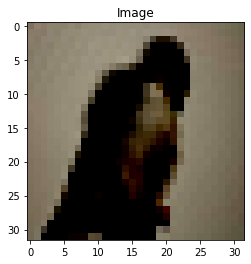

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : cat
예측값 : cat
img's shape : torch.Size([3, 32, 32])


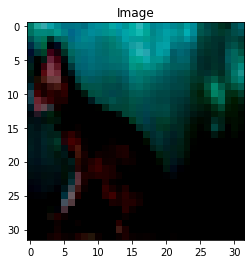

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


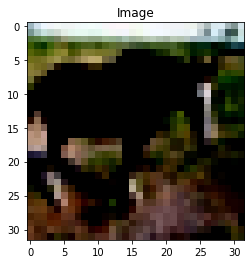

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : ship
예측값 : ship
img's shape : torch.Size([3, 32, 32])


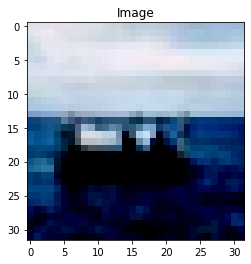

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : deer
예측값 : deer
img's shape : torch.Size([3, 32, 32])


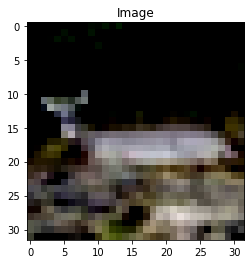

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : cat
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


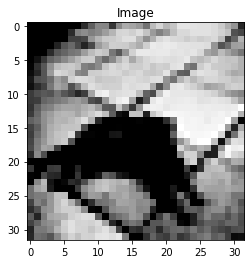

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


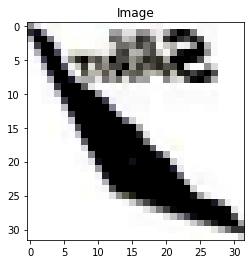

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : truck
예측값 : truck
img's shape : torch.Size([3, 32, 32])


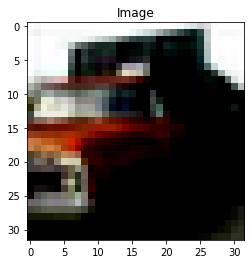

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


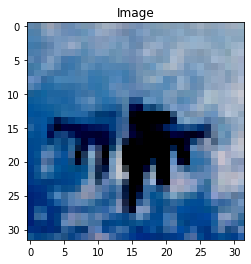

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : airplane
예측값 : airplane
img's shape : torch.Size([3, 32, 32])


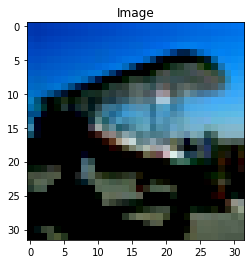

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


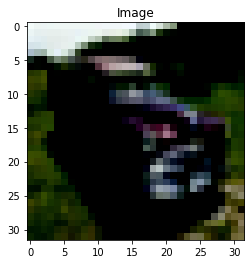

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : airplane
예측값 : ship
img's shape : torch.Size([3, 32, 32])


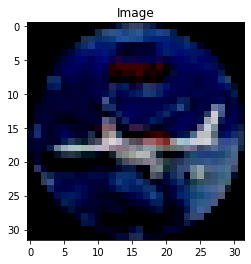

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : deer
예측값 : deer
img's shape : torch.Size([3, 32, 32])


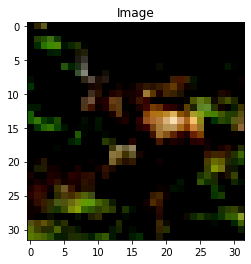

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


실제값 : deer
예측값 : deer
img's shape : torch.Size([3, 32, 32])


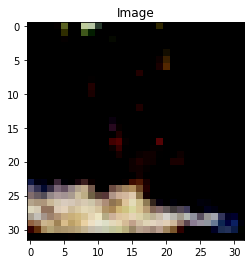

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : frog
예측값 : frog
img's shape : torch.Size([3, 32, 32])


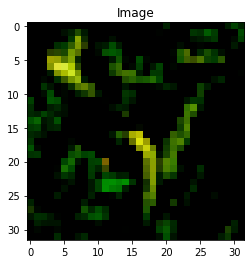

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : horse
예측값 : horse
img's shape : torch.Size([3, 32, 32])


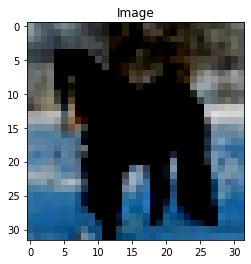

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : frog
예측값 : horse
img's shape : torch.Size([3, 32, 32])


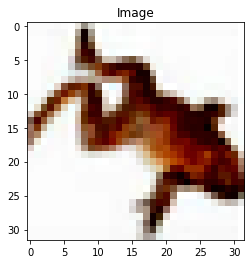

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


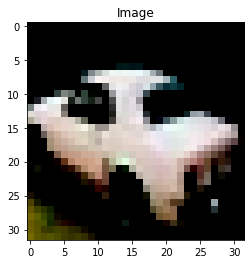

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



실제값 : automobile
예측값 : automobile
img's shape : torch.Size([3, 32, 32])


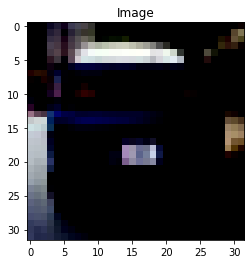

In [22]:
model.eval()
softmax = nn.Softmax(dim=1)

with torch.no_grad():
    _, (imgs, labels) = list(enumerate(test_loader))[13]
    for img, label in zip(imgs, labels):
        output = model(img.view(1,3,32,32).cuda())
        output = softmax(output)
        o_val, o_idx = torch.max(output, dim=1)

        print("실제값 :", label_names[label])
        print("예측값 :", label_names[o_idx])
        print("img's shape : {}".format(img.shape))
        plt.imshow(np.transpose(img, (1,2,0)))
        plt.title("Image")
        plt.show()
        print()